# Introduction

The Arnoldi algorithm is an iterative process that can be used for identifying eigenvalues of a matrix. This process is illustrated graphically below by plotting Arnoldi lemnicates at several sequential iteration steps. For more details, refer to p.262 of *Numerical Linear Algebra* by Lloyd Trefethen and David Bau III.

# Defining Required Functions and Procedures

First, import and configure required Python packages.

In [37]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
plt.style.use('seaborn')

Define and test a function `arnoldi`. The inputs of this function are a square matrix $A$ and the desired number of Arnoldi iterations. The ouputs of this function are the square matrices $Q$ and $H$ such that $A = QHQ^*$. To test this function, first generate a random 100 by 100 matrix $A$, perform the full Arnoldi algorithm to obtain 100 by 100 matrices $Q$ and $H$, and then verify that $A = QHQ^*$.

In [2]:
# Define the function.
def arnoldi(A, num_iter):
    m = A[0].size
    H = np.zeros((num_iter+1,num_iter))
    Q = np.zeros((m,num_iter+1))
    b = np.ones(m)
    Q[:,0] = b/np.linalg.norm(b)
    for n in range(num_iter):
        v = A @ Q[:,n]
        for j in range(n+1):
            H[j,n] = np.vdot(Q[:,j],v)
            v = v - H[j,n]*Q[:,j]
        H[n+1,n] = np.linalg.norm(v)
        Q[:,n+1] = v/H[n+1,n]
    Q = Q[:,0:num_iter]
    H = H[0:num_iter,:]
    return Q, H
        
# Test the function.
A = np.random.randn(100,100)
(Q,H) = arnoldi(A,100)
if np.allclose(A,Q @ H @ Q.conj().T):
    print('test passed')
else:
    print('test failed')

test passed


Define a function `lemniscate`. The inputs of this function are a square matrix $A$ and the desired number of Arnoldi iterations. The outputs of this function are the Arnoldi lemniscate curves (`lem_x` and `lem_y`), the eigenvalues of A (`ew`), and the Ritz values (`H_ew`).

In [7]:
def lemniscate(A, num_iter):
    (Q,H) = arnoldi(A,num_iter)
    (ew,ev) = np.linalg.eig(A)
    (H_ew,H_ev) = np.linalg.eig(H)

    p_coeffs = np.poly(H)
    p = np.poly1d(p_coeffs)

    pA = 0
    power = p_coeffs.size - 1
    for coeff in p_coeffs:
        pA += coeff*np.linalg.matrix_power(A,power)
        power -= 1

    b = np.ones(m)
    c = np.linalg.norm(pA @ b)/np.linalg.norm(b)
    lem_x = np.linspace(-5,5,1000)
    lem_y = np.full(lem_x.size, np.nan)
    for i in range(lem_x.size):
        x = lem_x[i]
        f = lambda y: np.abs(p(x+y*1j)) - c
        try:
            y = scipy.optimize.brentq(f,0,100)
            lem_y[i] = y
        except:
            pass

    for i in range(1,lem_y.size-1):
        if (np.isnan(lem_y[i]) and np.isnan(lem_y[i-1]) 
            and np.isfinite(lem_y[i+1])):
            lem_y[i] = 0
        if (np.isnan(lem_y[i]) and np.isfinite(lem_y[i-1]) and 
            np.isnan(lem_y[i+1]) and not lem_y[i-1]==0):
            lem_y[i] = 0
    
    return lem_x, lem_y, ew, H_ew

Define a procedure `plot_arn_lem`. The inputs of this procedure are the matrix $A$, the desired iteration start point `iter_start`, and the figure title `title`. The procedure generates four plots. The first plot shows the algorithm process after `iter_start` iterations, and the next three show the algorithm process at the next three iteration steps. Like Figure 34.3 in *Numerical Linear Algebra*, each plot contains the following elements:
* The eigenvalues of $A$ are shown as small dots.
* The Ritz values (eigenvalues of the Hessenberg matrix generated from $A$) are shown as large dots.
* The Arnoldi lemniscate curves are shown as solid lines.

In [53]:
def plot_arn_lem(A,iter_start,title):
    results = list()
    for i in range(4):
        (lem_x, lem_y, ew, H_ew) = lemniscate(A,i+iter_start)
        results.append((lem_x, lem_y, ew, H_ew))

    fig,axes = plt.subplots(nrows=2,ncols=2,figsize=[10,10],
                            sharex=True,sharey=True)
    plt.suptitle(title,fontsize=20)
    axes = axes.ravel()
    for i in range(len(axes)):
        lem_x = results[i][0]
        lem_y = results[i][1]
        ew = results[i][2]
        H_ew = results[i][3]
        axes[i].plot(H_ew.real,H_ew.imag,'o',markersize=10)
        axes[i].plot(ew.real,ew.imag,'o',markersize=4)
        axes[i].plot(lem_x,lem_y,color='b')
        axes[i].plot(lem_x,-lem_y,color='b')
        axes[i].set_title('n = '+str(i+iter_start))
    axes[0].set_aspect('equal', 'datalim')
    plt.show()

Define functions `rand_sq_mat` and `rand_tri_mat`, which generate random $m\times m$ square and upper-triangular matrices, respectively. Each element in these matrices is randomly selected from the real normal distribution of mean 0 and standard deviation $m^{-1/2}$. Setting the function input `symmetric` to `True` will yield symmetric matrices.

In [58]:
# Define function that generates random square matrices.
def rand_sq_mat(m,symmetric=False):
    A = np.random.randn(m,m)/np.sqrt(m)
    for i in range(m):
        for j in range(m):
            if symmetric and j<i:
                A[i,j] = A[j,i]
    return A

# Define function that generates random triangular matrices.
def rand_tri_mat(m,symmetric=False):
    A = np.random.randn(m,m)/np.sqrt(m)
    for i in range(m):
        for j in range(m):
            if j<i:
                A[i,j] = 0
            if symmetric and i<j:
                A[i,j] = 0
    return A

# Square Matrices

## Nonsymmetric with Clustered Eigenvalues
After one iteration, the area enclosed by the lemniscate curves defines the general region where most eigenvalues are located.

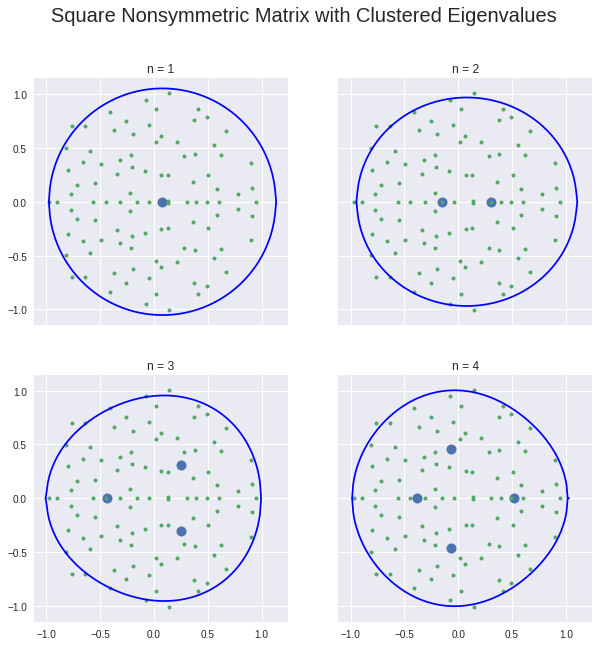

In [125]:
A = rand_sq_mat(m=100, symmetric=False)
plot_arn_lem(A, iter_start=1, 
             title='Square Nonsymmetric Matrix with Clustered Eigenvalues')

## Nonsymmetric with Eigenvalues that Aren't Clustered
An outlier eigenvalue is added to the matrix $A$ by setting the corner entry $a_{11}$ to 2. Within a few iterations, the algorithm is able to identify the location of this outlier eigenvalue.

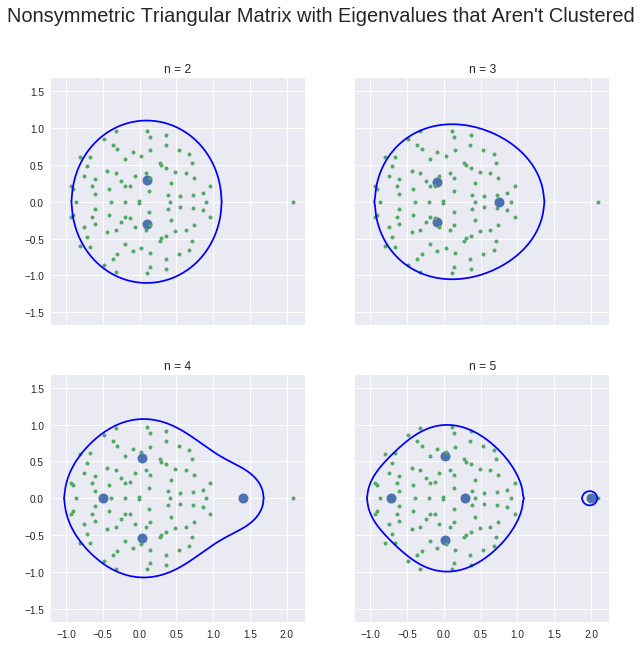

In [115]:
A = rand_sq_mat(m=100, symmetric=False)
A[0,0] = 2
plot_arn_lem(A, iter_start=2, 
    title='Nonsymmetric Triangular Matrix with Eigenvalues that Aren\'t Clustered')

## Symmetric with Clustered Eigenvalues
Within a few iterations the spread of Ritz values encompasses the general range on the real number line where most eigenvalues are located.

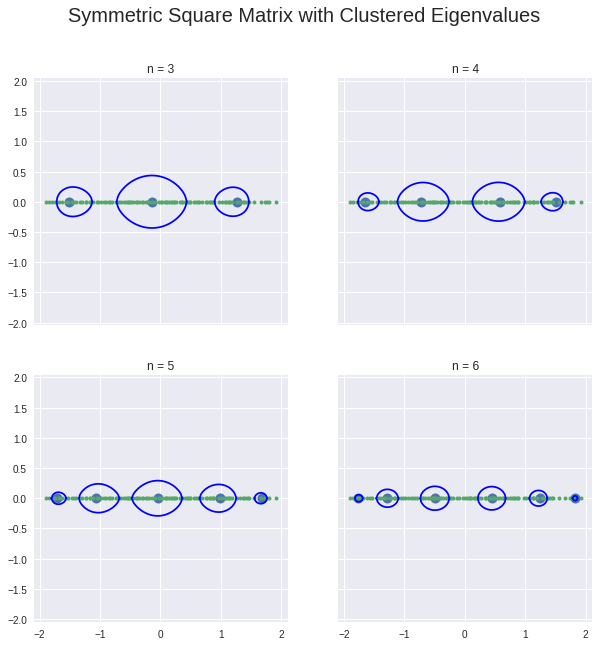

In [123]:
A = rand_sq_mat(m=100, symmetric=True)
plot_arn_lem(A, iter_start=3, 
             title='Symmetric Square Matrix with Clustered Eigenvalues')

## Symmetric with Eigenvalues that Aren't Clustered
An outlier eigenvalue is added to the matrix $A$ by setting the corner entry $a_{11}$ to 3. Within a few iterations, the algorithm is able to identify the location of this outlier eigenvalue.

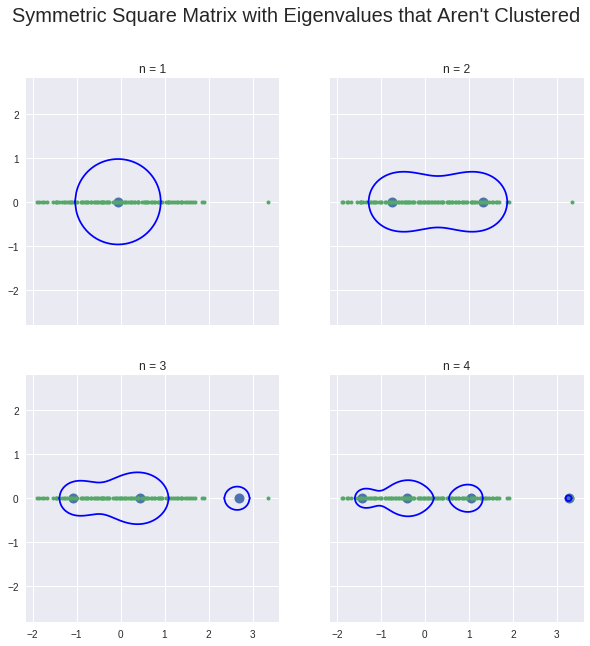

In [103]:
A = rand_sq_mat(m=100, symmetric=True)
A[0,0] = 3
plot_arn_lem(A, iter_start=1, 
             title='Symmetric Square Matrix with Eigenvalues that Aren\'t Clustered')

# Triangular Matrices

## Nonsymmetric with Clustered Eigenvalues
Within a few iterations, the real components of the Ritz values encompass the region where most eigenvalues are located.

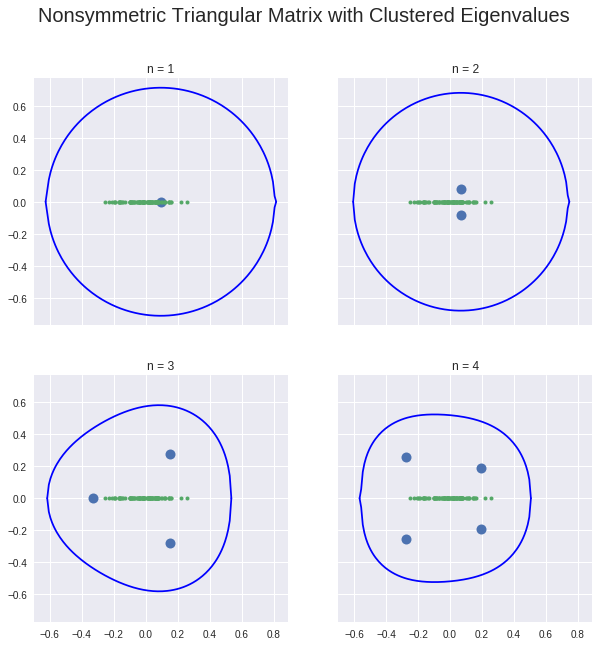

In [124]:
A = rand_tri_mat(m=100, symmetric=False)
plot_arn_lem(A, iter_start=1, 
             title='Nonsymmetric Triangular Matrix with Clustered Eigenvalues')

## Nonsymmetric with Eigenvalues that Aren't Clustered
An outlier eigenvalue is added to the matrix $A$ by setting the corner entry $a_{11}$ to 1.5. Within a few iterations, the algorithm is able to identify the location of this outlier eigenvalue.

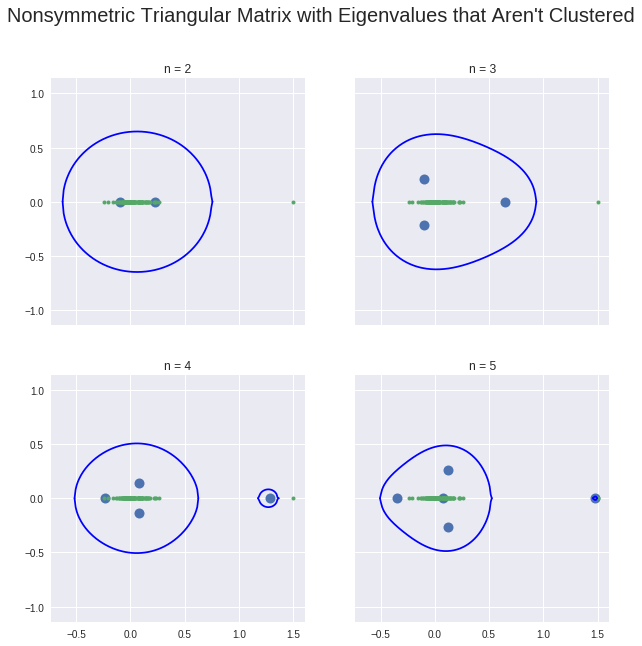

In [118]:
A = rand_tri_mat(m=100, symmetric=False)
A[0,0] = 1.5
plot_arn_lem(A, iter_start=2, 
    title='Nonsymmetric Triangular Matrix with Eigenvalues that Aren\'t Clustered')

## Symmetric with Clustered Eigenvalues
Within a few iterations the spread of Ritz values encompasses the general range on the real number line where most eigenvalues are located.

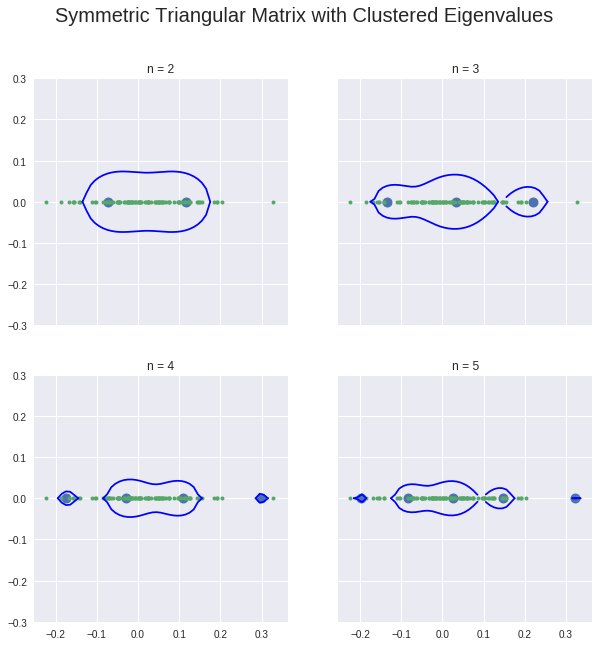

In [128]:
A = rand_tri_mat(m=100, symmetric=True)
plot_arn_lem(A, iter_start=2, 
             title='Symmetric Triangular Matrix with Clustered Eigenvalues')

## Symmetric with Eigenvalues that Aren't Clustered
An outlier eigenvalue is added to the matrix $A$ by setting the corner entry $a_{11}$ to 1.5. Within a few iterations, the algorithm is able to identify the location of this outlier eigenvalue.

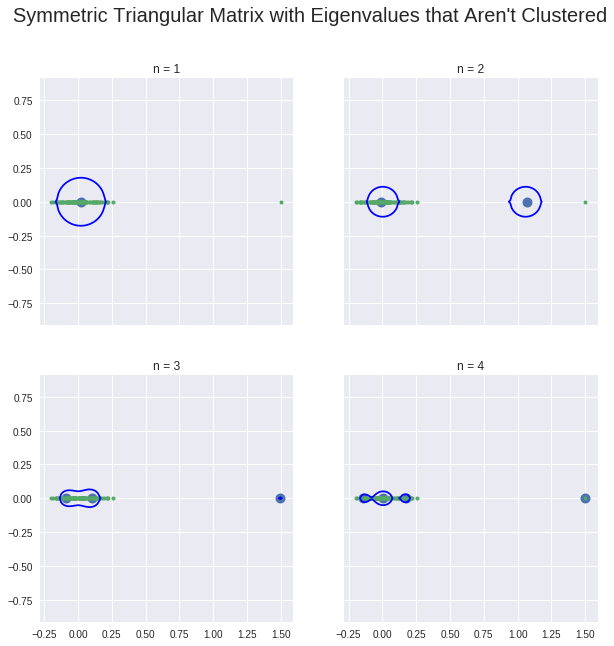

In [121]:
A = rand_tri_mat(m=100, symmetric=True)
A[0,0] = 1.5
plot_arn_lem(A, iter_start=1, 
        title='Symmetric Triangular Matrix with Eigenvalues that Aren\'t Clustered')